<a href="https://colab.research.google.com/github/akuresonite/Identification-by-Gait-Analysis/blob/main/Gait_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 2 : _Building a new Employee Security System (Machine Learning)_
You, as the Security analyst, at Stark Industries, have been tasked to build a new contactless
employee check-in system. Currently the employees use a physical keycard for entry into the
building like shown below.

You have come up with a new idea that uses the employees smartphone and machine learning
to provide a contactless system where when an employee enters the firm's territory, his or her
smartphone connects to the server and transmits data from the employee smartphone sensor
data like the accelerometer's data. The server performs the calculations and determines this
person as one of the employees using Gait analysis. Essentially it compares the current pattern of the employee's gait with the historial pattern and if there is a match, the doors automatically open
for the employee to walk in.

To test your idea, you have built a dataset of 30 employees and their daily activities here.
Design and develop a system that will perform the gait analysis.

Tip : Use Physics Toolbox Sensor Suite - Apps on Google Play to simulate the real time data
collection from a person's phone to test your model accuracy with real world data

# [0]. Downloading Data

Accelerometer, Gyroscope, Linear Acceleration data for x, y and z axis is collected for 3 persons, using [phyphox](https://phyphox.org/) android app available on play store.

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1QQmf4u84_KdJ-N5uWtM1L5tI8qcyuELM?usp=sharing

Retrieving folder contents
Retrieving folder 1QXeSh8zapB0b6FTZPElFjCHk0jEQoD0E Ashish
Retrieving folder 1QhJW2Py9Wu4Cgph_KvzVztKphXVxYieH meta
Processing file 1Qktz7_OCqgjKO0ijp2KreupoUlatPwRt device.csv
Processing file 1QlY0_njFj-I8LsQw4vwKahbmiiZ3wS9N time.csv
Processing file 1Qgvoduigv3oZlV2oZyvrsseymoN2_rF7 Accelerometer.csv
Processing file 1QfeOZOzDQOc6RXLe79PlCe7gCacpNXY2 Gyroscope.csv
Processing file 1QdoZYY5cQBCwBqmh8xXlDFKsr-WbtKuO Linear Acceleration.csv
Processing file 1QiGIadPkhU1ouerChXCZCumSLiTiHB0i Magnetometer.csv
Retrieving folder 1S1Rm7utnNk9omfKjFDESbnmG_qL3ZIzO Ashish_test
Retrieving folder 1SFkgJofFhcuVvl4ep-bhbUSxs-WUmUsC meta
Processing file 1SQMsAd0Xp6GwnEAA9DtPDzGH9XUaHQ2j device.csv
Processing file 1SLwpMHGPlYFSiFynmGtrLvLhTqDo95EN time.csv
Processing file 1S5GX8byd17j-sjtS9Bk3RA9-ECY3teQQ Accelerometer.csv
Processing file 1SIMPJvW5VxOhE3U5uD7o7QEi7m-vQZ-- Gyroscope.csv
Processing file 1SIKzSLoUwi0ErT8G_GTtNH9Dk-C-E8JI Linear Acceleration.csv
Retrieving folder

# [1]. Importing Libraries

In [57]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# [2]. DataFrame Utility Functions

In [42]:
def merge_gait_data(folder_path):
    accelerometer_path = os.path.join(folder_path, "Accelerometer.csv")
    gyroscope_path = os.path.join(folder_path, "Gyroscope.csv")
    linear_accelerometer_path = os.path.join(folder_path, "Linear Acceleration.csv")

    accelerometer_df = pd.read_csv(accelerometer_path)
    gyroscope_df = pd.read_csv(gyroscope_path)
    linear_accelerometer_df = pd.read_csv(linear_accelerometer_path)

    merged_df = pd.merge(accelerometer_df, gyroscope_df, on="Time (s)")
    merged_df = pd.merge(merged_df, linear_accelerometer_df, on="Time (s)")

    return merged_df

def calculate_magnitudes(df):
    df['Acceleration Magnitude'] = np.sqrt(
        df['Acceleration x (m/s^2)']**2 +
        df['Acceleration y (m/s^2)']**2 +
        df['Acceleration z (m/s^2)']**2
    )
    df['Gyroscope Magnitude'] = np.sqrt(
        df['Gyroscope x (rad/s)']**2 +
        df['Gyroscope y (rad/s)']**2 +
        df['Gyroscope z (rad/s)']**2
    )
    df['Linear Acceleration Magnitude'] = np.sqrt(
        df['Linear Acceleration x (m/s^2)']**2 +
        df['Linear Acceleration y (m/s^2)']**2 +
        df['Linear Acceleration z (m/s^2)']**2
    )
    return df

def compute_fft(df):
    df['Acceleration FFT'] = np.abs(fft(df['Acceleration Magnitude'].to_numpy()))
    df['Gyroscope FFT'] = np.abs(fft(df['Gyroscope Magnitude'].to_numpy()))
    df['Linear Acceleration FFT'] = np.abs(fft(df['Linear Acceleration Magnitude'].to_numpy()))
    return df

def make_df(data_path):
    df = merge_gait_data(data_path)
    df = calculate_magnitudes(df)
    df = compute_fft(df)
    return df

# [3]. DataFrame Creation

In [60]:
data_dir = "/content/kinematics/"

df1 = make_df(data_dir + 'Ashish')
df1['person'] = 'Ashish'

df2 = make_df(data_dir + 'Katta')
df2['person'] = 'Katta'

In [61]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Acceleration Magnitude,Gyroscope Magnitude,Linear Acceleration Magnitude,Acceleration FFT,Gyroscope FFT,Linear Acceleration FFT,person
0,0.052902,3.01905,4.27695,8.935050,-0.190162,0.547800,0.201163,-0.060104,0.248466,0.540975,10.355776,0.613769,0.598332,520638.338631,92965.300037,349181.243849,Ashish
1,0.055405,2.98800,4.29105,8.947050,-0.179438,0.539275,0.200062,-0.081658,0.268101,0.546844,10.362961,0.602528,0.614479,5394.327976,1851.750474,11676.324379,Ashish
2,0.057908,2.96400,4.36095,8.932950,-0.163487,0.533912,0.194700,-0.105630,0.337989,0.532739,10.373079,0.591353,0.639691,11455.142875,2950.507795,23770.434000,Ashish
3,0.060410,2.90895,4.34100,8.893950,-0.156062,0.526487,0.195800,-0.160680,0.318039,0.493739,10.315456,0.582994,0.608889,5698.898927,1535.650436,11452.041575,Ashish
4,0.062913,2.81100,4.34895,8.806050,-0.148638,0.513700,0.194700,-0.258630,0.325990,0.405839,10.215753,0.569112,0.581261,8486.236215,1546.951597,17779.987947,Ashish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80427,110.492355,-1.46595,3.26805,8.809951,0.011000,-0.042350,-0.012788,-0.281612,0.589347,-0.549124,9.510226,0.045586,0.853330,2643.462305,1672.007986,3789.871067,Katta
80428,110.494857,-1.35300,3.16095,8.581051,-0.003850,-0.046613,-0.019112,-0.167799,0.479708,-0.777187,9.244277,0.050526,0.928599,4419.287341,604.771404,8914.395745,Katta
80429,110.497360,-1.24800,3.10305,8.343000,-0.024200,-0.050875,-0.027638,-0.064225,0.419852,-1.014858,8.988442,0.062751,1.100153,3564.719690,1812.645570,5650.662923,Katta
80430,110.499862,-1.19295,3.10095,8.164050,-0.047575,-0.052938,-0.038362,-0.009650,0.416829,-1.193604,8.814235,0.080854,1.264329,5842.017206,741.462024,11181.456831,Katta


In [45]:
df.person.value_counts()

,count
person,
Katta,40521
Ashish,39911


# [4]. Visualizing properties for identification

![image.png](https://cdn.sparkfun.com/assets/9/9/3/f/b/5112d375ce395ff927000002.jpg)

In [58]:
def plot_feature(df, feature):
    plt.figure(figsize=(25, 4))
    a,b = 0,1000
    plt.plot(df.loc[df.person == 'Ashish', 'Time (s)'].to_numpy()[a:b], df.loc[df.person == 'Ashish', feature].to_numpy()[a:b], label='Ashish')
    plt.plot(df.loc[df.person == 'Katta', 'Time (s)'].to_numpy()[a:b], df.loc[df.person == 'Katta', feature].to_numpy()[a:b], label='Katta')
    plt.legend(); plt.xlabel(r'Time $(s)$'); plt.ylabel(feature); plt.title('Ashish vs Katta ' + feature); plt.show()

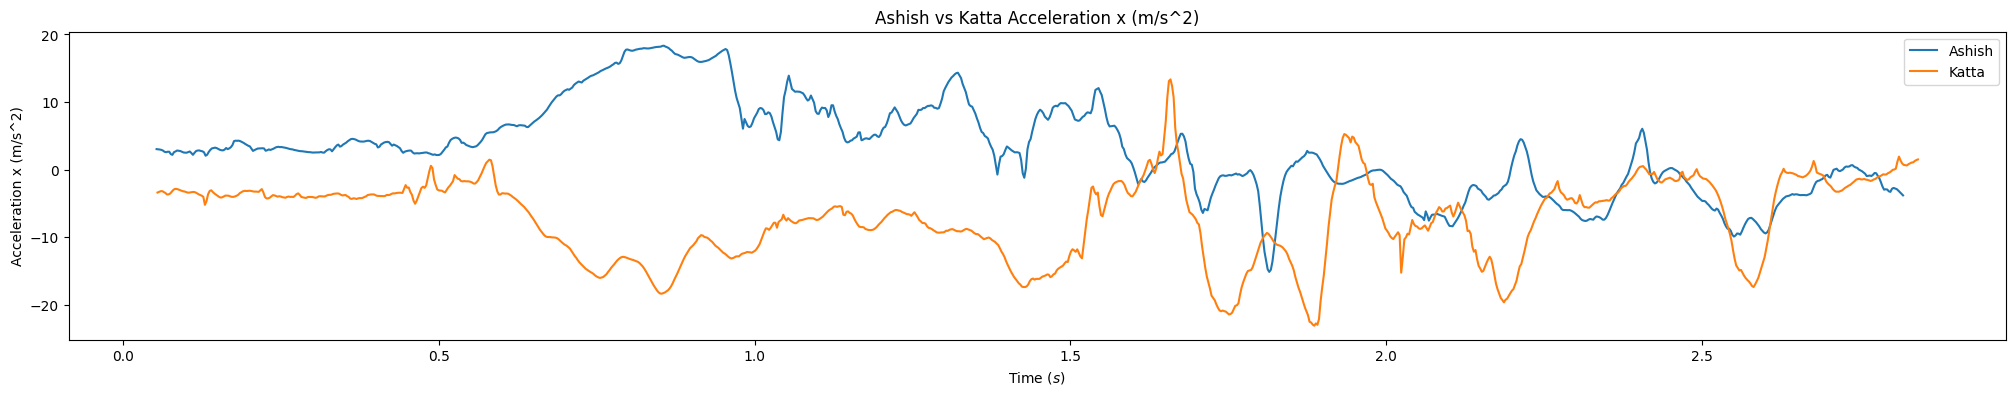

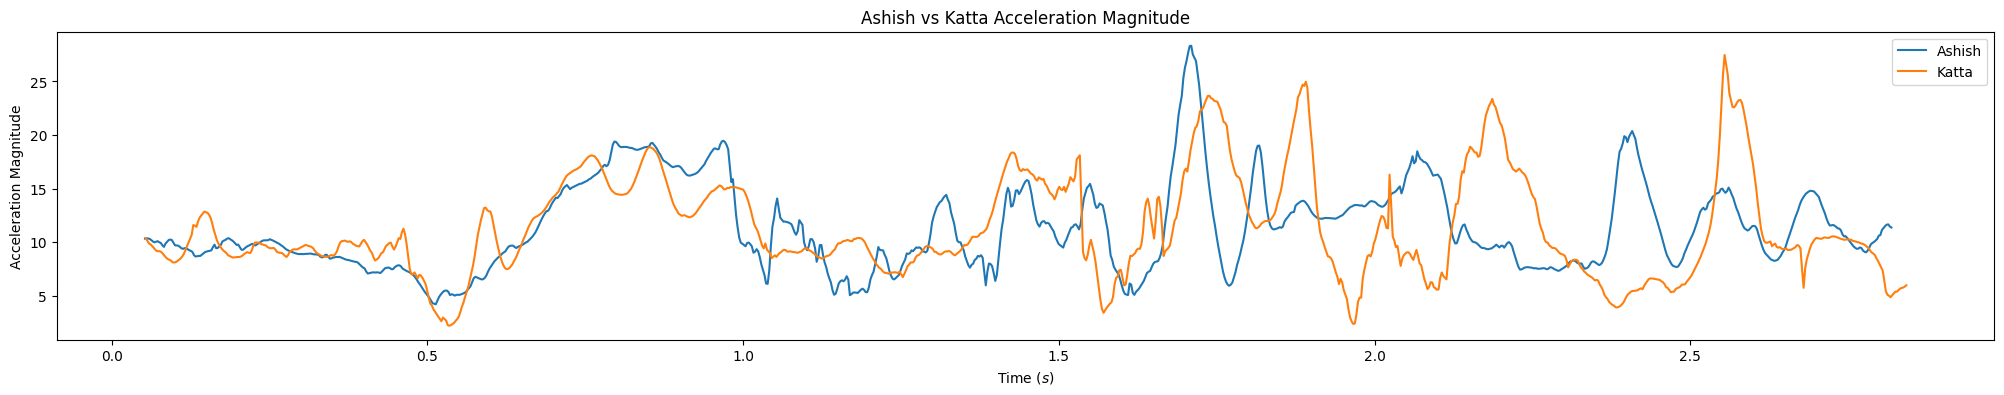

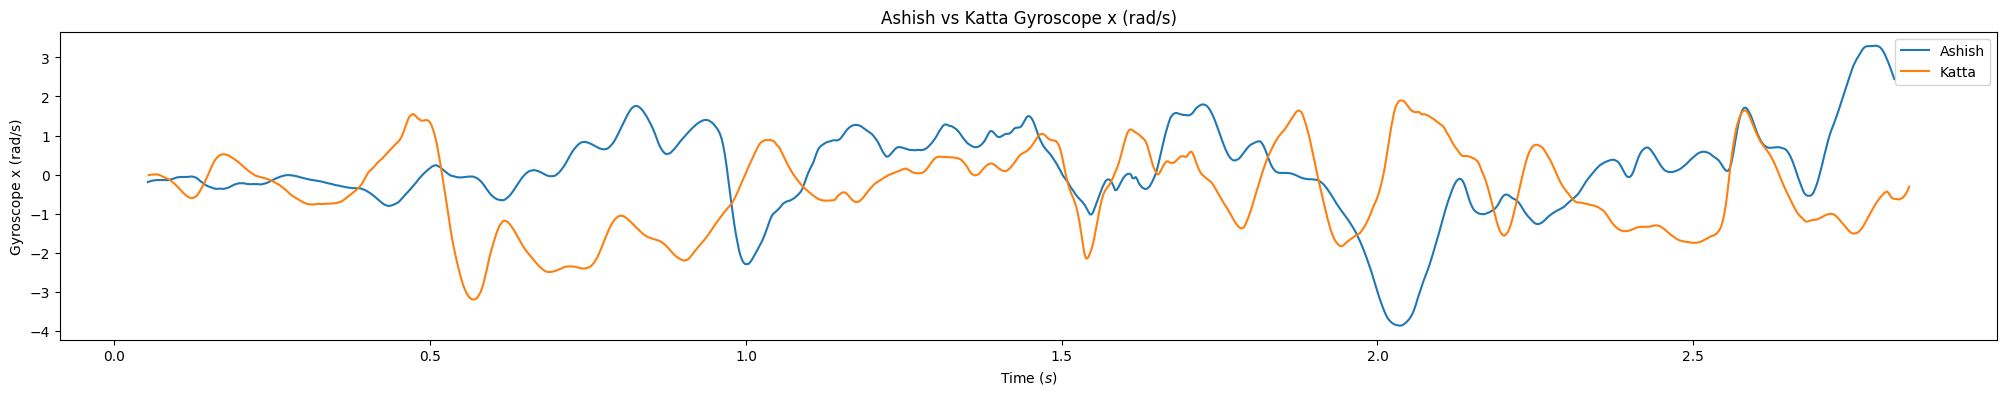

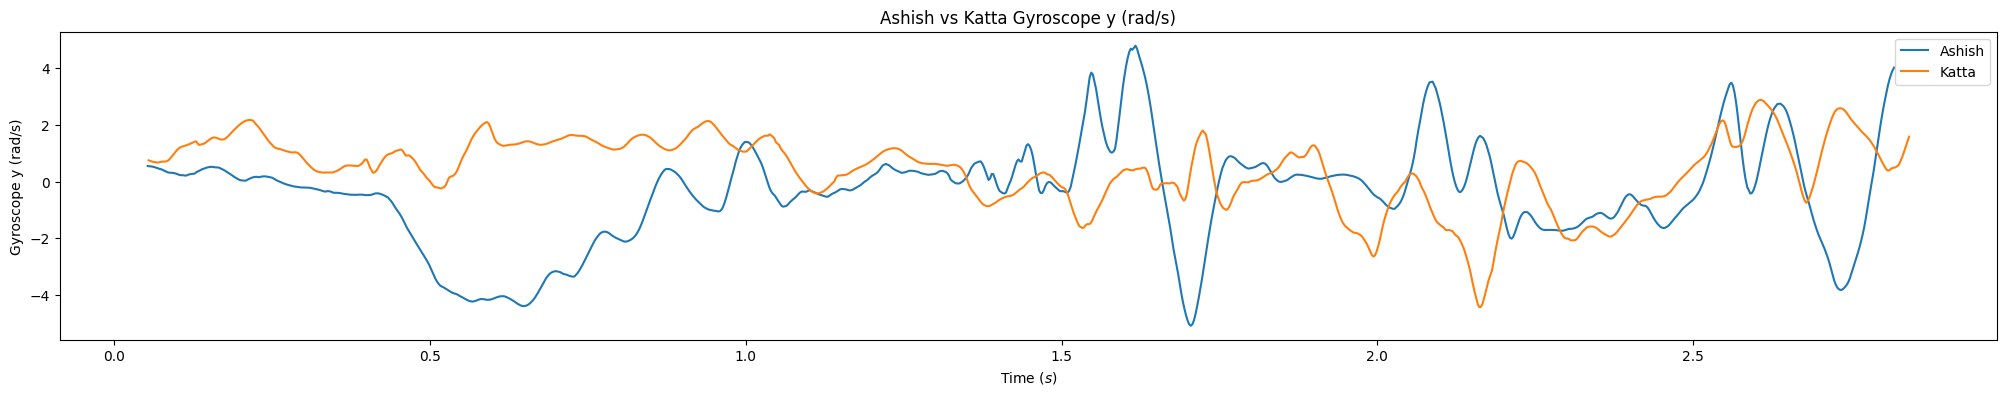

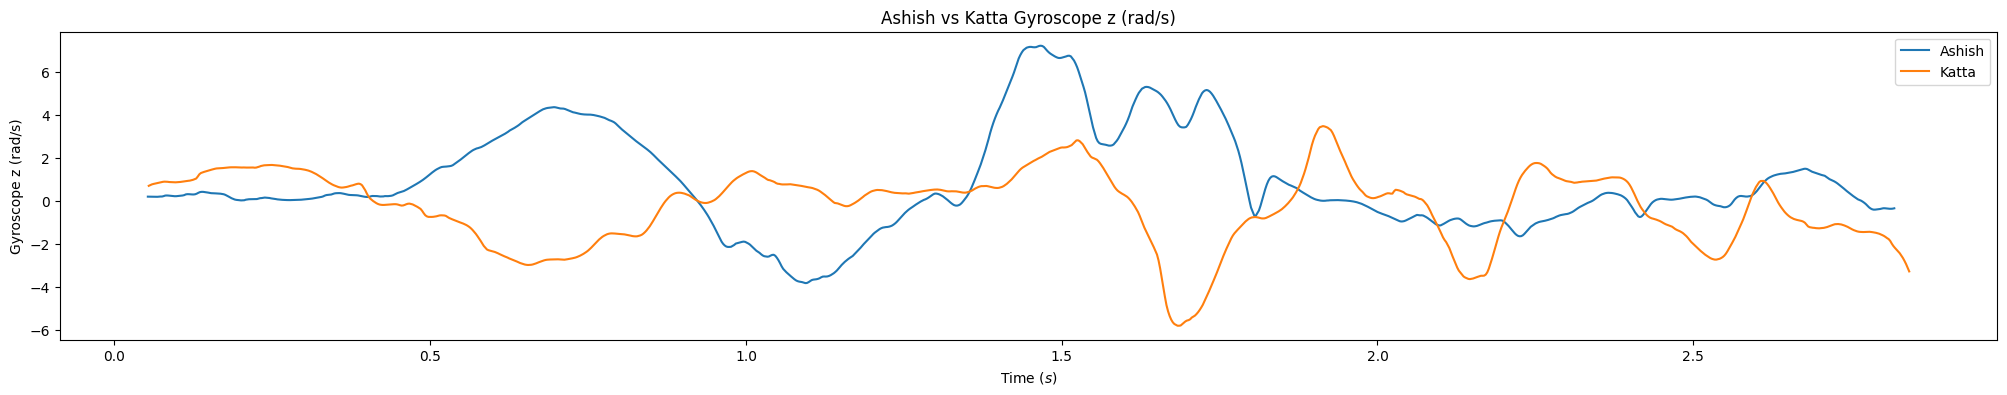

In [62]:
plot_feature(df, 'Acceleration x (m/s^2)')
plot_feature(df, 'Acceleration Magnitude')
plot_feature(df, 'Gyroscope x (rad/s)')
plot_feature(df, 'Gyroscope y (rad/s)')
plot_feature(df, 'Gyroscope z (rad/s)')

Different person has different trends in the properties

# [5]. Labeling Dataframe

In [48]:
label_map = {
    'Ashish': 0,
    'Katta': 1,
}

In [49]:
df.loc[df.person == 'Ashish', 'label'] = label_map['Ashish']
df.loc[df.person == 'Katta', 'label'] = label_map['Katta']

In [50]:
df = df.sample(frac=1, random_state=42, ignore_index=True)
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Acceleration Magnitude,Gyroscope Magnitude,Linear Acceleration Magnitude,Acceleration FFT,Gyroscope FFT,Linear Acceleration FFT,person,label
0,15.580265,-3.537000,-7.731000,-8.320050,2.736800,3.386487,0.215463,0.882129,0.493702,-11.319376,11.895460,4.359449,11.364425,267.725745,22.991309,265.455719,Ashish,0.0
1,88.434608,-5.664000,-1.899000,3.490950,-1.014200,-1.573138,-0.803825,-3.965658,7.759006,3.585442,6.919092,2.037032,9.422527,58.360668,6.305734,67.543897,Ashish,0.0
2,41.442238,8.533051,-5.383950,-0.321000,-0.482075,-0.779487,-0.458288,8.969335,4.378411,0.501401,10.094697,1.024707,9.993541,37.379950,6.158582,41.909722,Katta,1.0
3,106.198743,1.198950,-7.156050,8.049001,1.338838,-0.679250,-1.002925,-0.589350,0.021626,1.610574,10.836648,1.805471,1.715153,3270.756875,439.675664,3023.649728,Ashish,0.0
4,24.788084,-8.073000,-8.191051,8.266951,1.084188,1.135750,0.524150,-5.297793,1.211260,8.011600,14.163655,1.655332,9.680884,54.836773,0.393019,67.134624,Ashish,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80427,17.404818,-6.073950,-11.497951,2.866050,0.550963,-0.152075,-0.022825,-3.976883,-1.997029,4.092924,13.315779,0.572021,6.046135,70.448122,14.119437,111.332162,Ashish,0.0
80428,41.322122,0.093000,-10.926001,-2.953050,-0.148913,-3.042050,1.222100,1.401769,-1.251765,-2.022061,11.318421,3.281733,2.760544,38.186003,3.812948,59.375683,Katta,1.0
80429,101.343382,0.094950,-9.934051,1.378950,-0.319963,0.905850,-1.620713,-3.438276,-0.837178,0.412700,10.029750,1.884051,3.562713,503.352954,134.428370,510.227439,Katta,1.0
80430,2.435527,-0.759000,-12.553950,-6.724950,0.572412,-1.207662,-0.063387,0.691349,-2.914196,-5.656298,14.261932,1.337955,6.400329,1293.776608,159.977987,476.655904,Ashish,0.0


# [6]. Spliting into Train and Validation

In [51]:
X = df.drop(columns=['Time (s)', 'person', 'label'])
y = df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape
X_train.shape, X_val.shape

((24129, 15), (56303, 15))

# [7]. Fitting _RandomForestClassifier_

In [52]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=0, bootstrap=True)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred))

Train Accuracy: 1.0
Validation Accuracy: 0.9946894481643962
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11973
         1.0       1.00      1.00      1.00     12156

    accuracy                           1.00     24129
   macro avg       1.00      1.00      1.00     24129
weighted avg       1.00      1.00      1.00     24129

Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     27938
         1.0       0.99      1.00      0.99     28365

    accuracy                           0.99     56303
   macro avg       0.99      0.99      0.99     56303
weighted avg       0.99      0.99      0.99     56303



# [8]. Identify the person using classifier on test data

If the person mobile phone will connect to the network, then server will ask for data and model will start sending the data. And based on the data of 5 to 10 seconds, the model will identify that person.

In [53]:
def identify(data_path, model=clf, label_map=label_map):
    inv_label_map = {v:k for k,v in label_map.items()}
    person = data_path.split('/')[-1].split("_")[0]
    if person in inv_label_map.values():

        df = make_df(data_path)
        X = df.drop(columns=['Time (s)'])
        # print(len(X))
        # X = X.iloc[:,:]
        # print(len(X))

        preds = model.predict(X)

        unique, counts = np.unique(preds, return_counts=True)
        counts = (counts / counts.sum())
        value_counts = dict(zip(unique, counts))

        return inv_label_map[np.argmax(counts)], 100*counts[np.argmax(counts)]

    else:
        return 'Unknown', 0

Test data is collected, with is not using in training. Out of all the values in the test dataframe, model label 80% as true persion.

In [54]:
pred = identify('/content/kinematics/Ashish_test')
pred

('Ashish', 80.47016274864376)

In [55]:
pred = identify('/content/kinematics/Katta')
pred

('Katta', 99.75568223883911)

In [56]:
pred = identify('/content/kinematics/Deepak')
pred

('Unknown', 0)